# Simple Linear Regression

In [127]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [128]:
#Load The Data
data = pd.read_csv("C:/Users/ywuyy/OneDrive/Documents/DataEngineering/MachineLearningModels/FuelConsumptionPredictionModel/Data/FuelConsumptionCo2.csv")

In [129]:
#Checking Data
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Exploratory Data Analysis

In [130]:
data.describe().round()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.0,1067.0,1067.0,1067.0,1067.0,1067.0,1067.0
mean,2014.0,3.0,6.0,13.0,9.0,12.0,26.0,256.0
std,0.0,1.0,2.0,4.0,3.0,3.0,7.0,63.0
min,2014.0,1.0,3.0,5.0,5.0,5.0,11.0,108.0
25%,2014.0,2.0,4.0,10.0,8.0,9.0,21.0,207.0
50%,2014.0,3.0,6.0,13.0,9.0,11.0,26.0,251.0
75%,2014.0,4.0,8.0,16.0,11.0,13.0,31.0,294.0
max,2014.0,8.0,12.0,30.0,20.0,26.0,60.0,488.0


In [131]:
#Checking For The Null Values
data['CO2EMISSIONS'].isnull().sum()

0

In [132]:
data['CO2EMISSIONS'].mean()

256.2286785379569

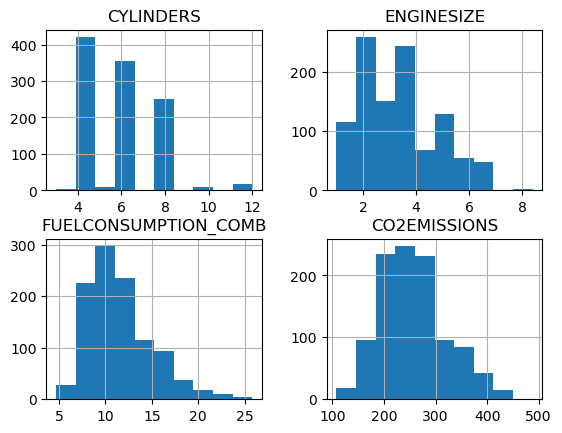

In [133]:
#Plot Each Features

plot_data = data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
plot_data.hist()
plt.show()

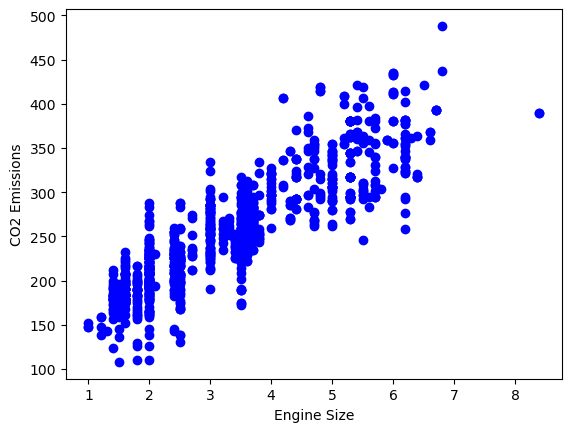

In [134]:
#Plot Each Of The Features Against The CO2EMISSIONS Column

plt.scatter(data.ENGINESIZE, data.CO2EMISSIONS, color = 'blue')
plt.xlabel ('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

Obervations From The Above Scatter Plot Diagram

As we can see the above scatter plot between the ENGINESIZE and CO2EMISSIONS we can clearly observe there is a 

linear relationship between both the features

As Engine size increasing the co2 emissionsare also increasing


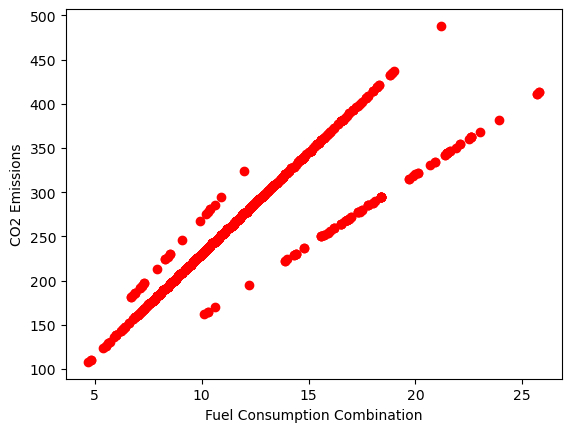

In [135]:
#Plot The Scatter Plot Between The FUELCONSUMPTION_COMB and CO2EMISSIONS

plt.scatter(data.FUELCONSUMPTION_COMB, data.CO2EMISSIONS, color = 'red')
plt.xlabel('Fuel Consumption Combination')
plt.ylabel('CO2 Emissions')
plt.show()

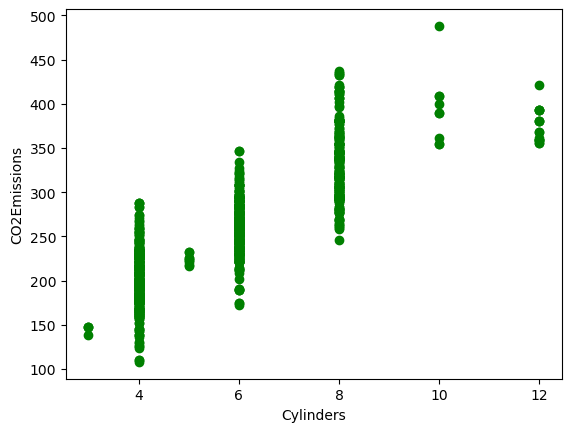

In [136]:
#Plot The Scatter Plot Between The CYLINDERS and CO2EMISSIONS COlumns

plt.scatter(data.CYLINDERS, data.CO2EMISSIONS, color = 'green')
plt.xlabel('Cylinders')
plt.ylabel('CO2Emissions')
plt.show()

# Creating Train and Test Dataset

In [138]:
# 80% Of The Entire Dataset Can Be Used To Train The Model And 20% Of The Dataset Is Used To Test The Model

mask = np.random.rand(len(data)) < 0.8
train = data[mask]
test = data[~mask]

Simple Regression Model suits best for the dataset we have

# Train Data Distribution

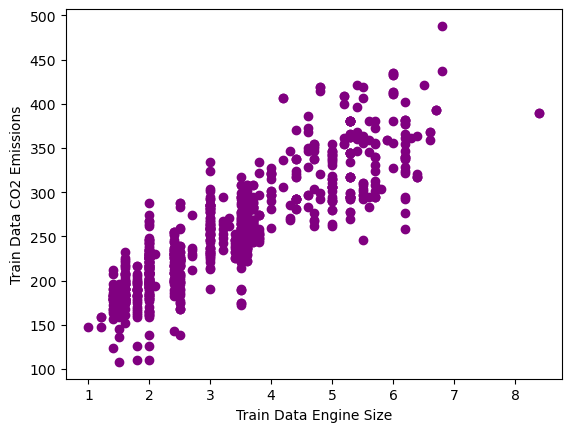

In [139]:
#Plot The Scatter Plot For The Train Data Between The ENGINESIZE And CO2EMISSIONS Column

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'purple')
plt.xlabel('Train Data Engine Size')
plt.ylabel('Train Data CO2 Emissions')
plt.show()

In [140]:
train['CO2EMISSIONS'].value_counts().sum()

857

In [141]:
data['CO2EMISSIONS'].value_counts().sum()

1067

# Data Modeling

In [142]:
#Use sklean package to Model The Data

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print('Coefficient : ', regr.coef_)
print('Intercept : ', regr.intercept_)

Coefficient :  [[38.78586173]]
Intercept :  [127.26686152]


# The both coefficient and the intercept in the simple linear regression are the parameters of the fit line 

Text(0, 0.5, 'CO2 Emissions')

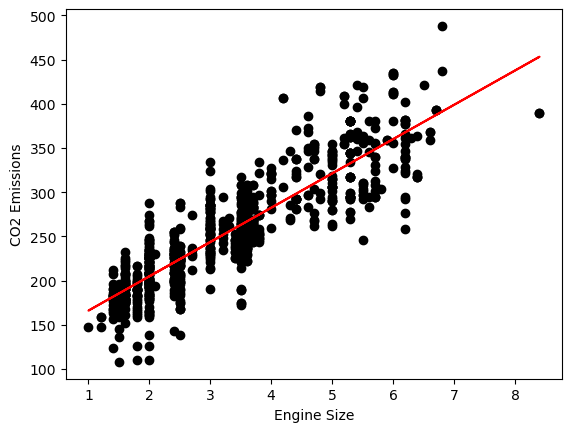

In [143]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'black')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], color = 'red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

# Predicted Value = slope * EngineSize  + Intercept

# Evaluation

In [144]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean Absolute Error : %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Mean Squared Error (MSE) : %.2f" % np.mean((test_y - test_y_) ** 2))
print("R2-Score %.2f" % r2_score(test_y, test_y_))

Mean Absolute Error : 22.63
Mean Squared Error (MSE) : 854.93
R2-Score 0.79


# All the above metrics suggest that the linear regression model is providing accurate predictions on the given dataset